# Introduction
Visualise correspondences between the 3 sheets so that the type of correspondences can be understood.

Idea:
- display 3 (target, source 1, source 2) sheets side by side
- colour cells in target and source 1 blue
- colour cells in target and source 2 purple
- colour cells in target and source 1 and source 2 green

Can extend later to show more relative difference information.
For example if two cells have the same relative distance in target and source 1, make them darker.

In [27]:
%load_ext autoreload
%autoreload 2
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tacomin.compress import components


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import duckdb

In [ ]:
df = pd.read_parquet('experiments/results/ftripples.parquet')
df = df[df.score > 0]
# Now get the highest scoring row per component
dfc = components(df, 1000)


In [2]:
dfc.shape

(29, 11)

In [5]:
dfc.head()

,i,j,k,score,sa1i,sa2i,inter,denom,denom1,denom2,component
component,,,,,,,,,,,
132,129896.0,252145.0,238757.0,0.238178,115.0,69.0,79.0,274.0,199.0,197.0,132.0
755,98551.0,172408.0,270362.0,0.112303,32.0,35.0,15.0,198.0,241.0,328.0,755.0
31882,218328.0,218329.0,218327.0,0.106933,194.0,11.0,30.0,332.0,308.0,380.0,31882.0
92,22973.0,228256.0,6948.0,0.101843,25.0,19.0,13.0,114.0,79.0,642.0,92.0
1224,255238.0,255239.0,217921.0,0.093114,54.0,19.0,16.0,244.0,85.0,549.0,1224.0


In [7]:
res = duckdb.sql("""
select index, i, f, s, fs, rows, cols from 'experiments/results/parquet/df_*.parquet'
limit 10
""")
res.show()

┌───────┬───────┬──────────────────────────────────────────────────┬───────┬───────┬───────┬───────┐
│ index │   i   │                        f                         │   s   │  fs   │ rows  │ cols  │
│ int64 │ int64 │                     varchar                      │ int64 │ int64 │ int64 │ int64 │
├───────┼───────┼──────────────────────────────────────────────────┼───────┼───────┼───────┼───────┤
│     0 │     0 │ cc-binaries/69f8dc77-cec7-4a92-8519-fb49aab6ae43 │     0 │    26 │     1 │    13 │
│     0 │     0 │ cc-binaries/cc8b432c-5517-4358-9162-43af7e5defc5 │     0 │    57 │     1 │    13 │
│     0 │     0 │ cc-binaries/38405202-0ab1-44d3-820e-a52102e1d208 │     0 │    87 │   100 │    58 │
│     1 │     1 │ cc-binaries/38405202-0ab1-44d3-820e-a52102e1d208 │     0 │    87 │   100 │    58 │
│     2 │     2 │ cc-binaries/38405202-0ab1-44d3-820e-a52102e1d208 │     0 │    87 │   100 │    58 │
│     3 │     3 │ cc-binaries/38405202-0ab1-44d3-820e-a52102e1d208 │     0 │    87 │   100 

In [12]:
cols = [f"{i}" for i in range(20)]
res = duckdb.sql(f"""
select
    fs, s, {','.join(f'"{col}"' for col in cols)}
from 'experiments/results/parquet/df_*.parquet'
limit 10
""")
res.show()


┌───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┐
│  fs   │   s   │   0   │   1   │   2   │   3   │   4   │   5   │   6   │   7   │   8   │   9   │  10   │  11   │  12   │  13   │  14   │  15   │  16   │  17   │  18   │  19   │
│ int64 │ int64 │ int64 │ int64 │ int64 │ int64 │ int64 │ int64 │ int64 │ int64 │ int64 │ int64 │ int64 │ int64 │ int64 │ int64 │ int64 │ int64 │ int64 │ int64 │ int64 │ int64 │
├───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│    26 │     0 │    12 │    13 │     4 │     5 │     7 │    11 │     9 │     6 │    10 │     1 │     2 │     8 │     3 │     0 │     0 │     0 │     0 │     0 │     0 │     0 │
│    57 │     0 │    12 │    13 │     4 │     5 │     7 │    11 │     9 │     6 │    10 │     1 │     2 │     

In [95]:
lookup_i = dfc.k.iloc[0]
def lookup(fs):
    res = duckdb.sql(f"""
    select
        f, fs, s, rows, cols, {','.join(f'"{col}"' for col in cols)}
    from 'experiments/results/parquet2/df_*.parquet'
    where fs = {fs}
    limit 100
    """)
    res_df = res.df()
    fname = res_df.f.iloc[0]
    nrows = res_df.rows.iloc[0]
    ncols = res_df.cols.iloc[0]
    return res_df[cols], fname, nrows, ncols
dfd, fname, nrows, ncols = lookup(lookup_i)
print(fname, nrows, ncols)
dfd

cc-binaries/26c8bb06-0e49-4bd1-b447-a3c1ae19a087 100 2


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1495447,5255,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449
1,1134203,1134316,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449
2,1134416,1134244,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449
3,1134313,1134411,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449
4,1495454,1495452,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1495433,1495442,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449
96,1495418,1495450,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449
97,1495427,1495456,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449
98,1495457,1495425,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449


In [99]:
# 1134316
len(vset2 & vset3)
np.isin(d_c3, list(vset1 & vset2)).sum()
np.isin(d_c2, list(vset1 & vset3)).sum()
np.isin(d_c1, list(vset2 & vset3)).sum()
len(vset1), len(vset2), len(list(vset1 & vset2)), len(vset1 & vset2 & vset3)
np.isin(d_c2, list(vset1 | vset3)).sum()
list(vset1 | vset3)

[np.int64(5255),
 np.int64(1089847),
 np.int64(1089872),
 np.int64(1495414),
 np.int64(1495415),
 np.int64(1495416),
 np.int64(3449),
 np.int64(1495417),
 np.int64(1495419),
 np.int64(1495420),
 np.int64(1495421),
 np.int64(1495422),
 np.int64(1495423),
 np.int64(1495424),
 np.int64(1495425),
 np.int64(1495418),
 np.int64(1495426),
 np.int64(1495427),
 np.int64(1495428),
 np.int64(1495429),
 np.int64(1495430),
 np.int64(1495431),
 np.int64(1495432),
 np.int64(1495433),
 np.int64(1495434),
 np.int64(1495435),
 np.int64(1495436),
 np.int64(1495437),
 np.int64(1495438),
 np.int64(1495439),
 np.int64(1495440),
 np.int64(1495441),
 np.int64(1495442),
 np.int64(1495443),
 np.int64(1495444),
 np.int64(1495445),
 np.int64(1495446),
 np.int64(1495447),
 np.int64(1495448),
 np.int64(1495449),
 np.int64(1495450),
 np.int64(1495451),
 np.int64(1495452),
 np.int64(1495453),
 np.int64(1495454),
 np.int64(1495455),
 np.int64(1495456),
 np.int64(1495457),
 np.int64(1495458),
 np.int64(1495459),
 np.in

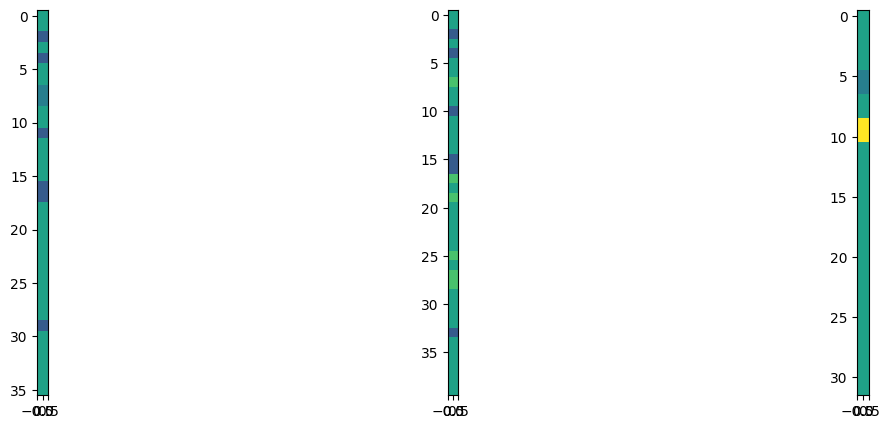

In [119]:
def disp(n):
    dfd1, fname1, nrows1, ncols1 = lookup(dfc.i.iloc[n])
    dfd2, fname2, nrows2, ncols2 = lookup(dfc.j.iloc[n])
    dfd3, fname3, nrows3, ncols3 = lookup(dfc.k.iloc[n])
    vset1 = set(dfd1.values.flatten())
    vset2 = set(dfd2.values.flatten())
    vset3 = set(dfd3.values.flatten())

    d_v1 = dfd1.copy().values[:nrows1, :ncols1]
    d_c1 = dfd1.copy().values[:nrows1, :ncols1]
    d_c1[~np.isin(d_v1, list(vset2 | vset3))] = 1
    d_c1[np.isin(d_v1, list(vset2))] = 2
    d_c1[np.isin(d_v1, list(vset3))] = 3
    d_c1[np.isin(d_v1, list(vset2 & vset3))] = 4
    d_c1[d_v1 == 0] = 0
    d_c1[d_v1 == 3449] = 0

    d_v2 = dfd2.copy().values[:nrows2, :ncols2]
    d_c2 = dfd2.copy().values[:nrows2, :ncols2]
    d_c2[~np.isin(d_v2, list(vset1 | vset3))] = 5
    d_c2[np.isin(d_v2, list(vset1))] = 2
    d_c2[np.isin(d_v2, list(vset3))] = 6
    d_c2[np.isin(d_v2, list(vset1 & vset3))] = 4
    d_c2[d_v2 == 0] = 0
    d_c2[d_v2 == 3449] = 0

    d_v3 = dfd3.copy().values[:nrows3, :ncols3]
    d_c3 = dfd3.copy().values[:nrows3, :ncols3]
    d_c3[~np.isin(d_v3, list(vset1 | vset2))] = 7
    d_c3[np.isin(d_v3, list(vset1))] = 3
    d_c3[np.isin(d_v3, list(vset2))] = 6
    d_c3[np.isin(d_v3, list(vset1 & vset2))] = 4
    d_c3[d_v3 == 0] = 0
    d_c3[d_v3 == 3449] = 0

    # Plot side by side
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    # min is 0, max is 4
    rlim = 50
    axs[0].imshow(d_c1[:rlim, :], cmap='viridis', vmin=0, vmax=7)
    axs[1].imshow(d_c2[:rlim, :], cmap='viridis', vmin=0, vmax=7)
    axs[2].imshow(d_c3[:rlim, :], cmap='viridis', vmin=0, vmax=7)
    plt.show()
disp(23)

In [49]:
np.isin(dfd1.copy().values, list(vset2))

array([[ True, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True, False,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True, False,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True, False,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ T

In [43]:
dfd1.copy().values

array([[1134410, 1134174, 1134401, 1134174, 1134283,    3449,    3449,
           3449,    3449,    3449,    3449,    3449,    3449,    3449,
           3449,    3449,    3449,    3449,    3449,    3449],
       [1134225, 1134316, 1134203, 1134316, 1089847,    3449,    3449,
           3449,    3449,    3449,    3449,    3449,    3449,    3449,
           3449,    3449,    3449,    3449,    3449,    3449],
       [1134337, 1134195, 1134302, 1134302, 1089872,    3449,    3449,
           3449,    3449,    3449,    3449,    3449,    3449,    3449,
           3449,    3449,    3449,    3449,    3449,    3449],
       [1134289, 1134244, 1134416, 1134244, 1089847,    3449,    3449,
           3449,    3449,    3449,    3449,    3449,    3449,    3449,
           3449,    3449,    3449,    3449,    3449,    3449],
       [1134304, 1134411, 1134313, 1134411, 1089847,    3449,    3449,
           3449,    3449,    3449,    3449,    3449,    3449,    3449,
           3449,    3449,    3449,    

In [ ]:

def display_sheets(frm, to):
    # Load and display
    dfso = []
    for n, (if1, if2, if3, score, *als) in dfc.iloc[frm:to].iterrows():
        f1 = (index_name_map[if1])
        f2 = (index_name_map[if2])
        f3 = (index_name_map[if3])
        print(f'{frm}:')
        print(f'  index: {n}')
        print(f'  score: {score}')
        print(f'  als: {[int(a) for a in als]}')
        fstuples = [(f, s) for f, s in [f1, f2, f3]]
        print(f'  files: {[(f.name, s) for f, s in fstuples]}')
        dfs = []
        for i, (f, s) in enumerate(fstuples):
            buffer = tar.extractfile(f)
            df = pd.read_excel(io.BytesIO(buffer.read()), sheet_name=s, header=None, index_col=None)
            dfs.append(df)
        print(f'  shapes: {[df.shape for df in dfs]}')

        for df in dfs:
            display(df)
            print()
        dfso.append(dfs)
    return dfso


n = 0
df1, df2, df3 = display_sheets(n, n + 1)[0]
